In [1]:
import pandas as pd
import numpy as np
import random
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

from BirdSTEM.dataset.generate_random_samples import generate_fake_dataset
from BirdSTEM.utils.plot_gif import make_sample_gif


In [4]:
checklist_data = pd.read_csv('./BirdSTEM/dataset/test_data/checklist_data/checklist_data_filtered_2020.csv')

In [5]:
### mallard 2020
with open('./BirdSTEM/dataset/test_data/sp_data/Great_Tit/Great_Tit_2020.pkl','rb') as f:
    sp_data = pickle.load(f)
    

In [6]:
checklist_data = checklist_data.merge(sp_data, on='sampling_event_identifier', how='left')

In [7]:
checklist_data['count'] = checklist_data['count'].fillna(0)


# Plot gif

In [8]:
data = checklist_data[['sampling_event_identifier','DOY','longitude','latitude','count']].rename(columns={'count':'abundance'})
data['abundance'] = np.where(data['abundance']>0, 1, 0)


0.0.0.0.0.1.2.3.4.5.6.7.8.9.10.11.12.

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x16bed4430>
Traceback (most recent call last):
  File "/Users/chenyangkang/miniforge3/lib/python3.9/weakref.py", line 61, in _cb
    callback(self)
  File "/Users/chenyangkang/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 254, in _remove_proxy
    del self.callbacks[signal][cid]
KeyError: 'changed'
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x16bead4c0>
Traceback (most recent call last):
  File "/Users/chenyangkang/miniforge3/lib/python3.9/weakref.py", line 61, in _cb
    callback(self)
  File "/Users/chenyangkang/miniforge3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 254, in _remove_proxy
    del self.callbacks[signal][cid]
KeyError: 'changed'
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x16be080d0>
Traceback (most recent call last):
  File "/Users/chenyangkang/miniforge3/lib/python3.9/weakref.py", line 61, in _cb
    callb

13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.46.47.48.49.50.51.52.53.54.55.56.57.58.59.60.61.62.63.64.65.66.67.68.69.70.71.72.73.74.75.76.77.78.79.80.81.82.83.84.85.86.87.88.89.90.91.92.93.94.95.96.97.98.99.100.101.102.103.104.105.106.107.108.109.110.111.112.113.114.115.116.117.118.119.120.121.122.123.124.125.126.127.128.129.130.131.132.133.134.135.136.137.138.139.140.141.142.143.144.145.146.147.148.149.150.151.152.153.154.155.156.157.158.159.160.161.162.163.164.165.166.167.168.169.170.171.172.173.174.175.176.177.178.179.180.181.182.183.184.185.186.187.188.189.190.191.192.193.194.195.196.197.198.199.200.201.202.203.204.205.206.207.208.209.210.211.212.213.214.215.216.217.218.219.220.221.222.223.224.225.226.227.228.229.230.231.232.233.234.235.236.237.238.239.240.241.242.243.244.245.246.247.248.249.250.251.252.253.254.255.256.257.258.259.260.261.262.263.264.265.266.267.268.269.270.271.272.273.274.275.276.277.278.279.280.281.282.283.284

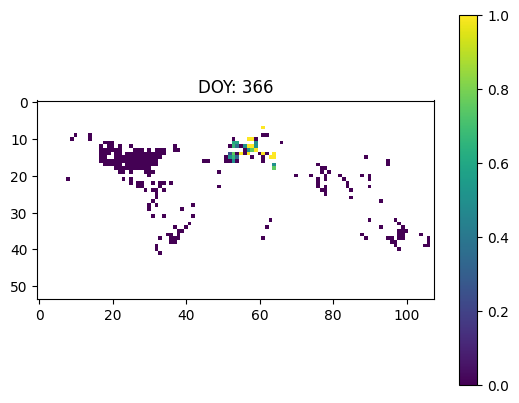

In [9]:
make_sample_gif(data ,'./Sample.gif', lng_size = 36*3, lat_size = 18*3)


# Get X and y

In [8]:
from BirdSTEM.dataset.get_test_x_names import get_test_x_names
x_names = get_test_x_names()
X = checklist_data[['sampling_event_identifier','longitude','latitude'] + x_names]
# y = np.where(checklist_data['count']>0, 1, 0)
y = checklist_data['count'].values


# First thing first: Train test split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3,
                                                    stratify = np.where(y>0, 1, 0), shuffle=True)


# Test QuadTree

In [145]:
from BirdSTEM.utils.quadtree import QTree
grid_len_long_upper_threshold=25
grid_len_long_lower_threshold=1
grid_len_lat_upper_threshold=25
grid_len_lat_lower_threshold=1
points_lower_threshold=20
rotation_angle = np.random.uniform(0,360)
calibration_point_x_jitter = np.random.uniform(-10,10)
calibration_point_y_jitter = np.random.uniform(-10,10)

QT_obj = QTree(grid_len_long_upper_threshold=grid_len_long_upper_threshold, \
                grid_len_long_lower_threshold=grid_len_long_lower_threshold, \
                grid_len_lat_upper_threshold=grid_len_lat_upper_threshold, \
                grid_len_lat_lower_threshold=grid_len_lat_lower_threshold, \
                points_lower_threshold=points_lower_threshold, \

                long_lat_equal_grid = True, rotation_angle = rotation_angle, \
                    calibration_point_x_jitter = calibration_point_x_jitter,\
                        calibration_point_y_jitter = calibration_point_y_jitter)


In [146]:

## Give the data and indexes. The indexes should be used to assign points data so that base model can run on those points,
## You need to generate the splitting parameters once giving the data. Like the calibration point and min,max.
QT_obj.add_long_lat_data(data.index, data['longitude'].values, data['latitude'].values)
QT_obj.generate_griding_params()

## Call subdivide to precess
QT_obj.subdivide()
this_slice = QT_obj.get_final_result()


In [149]:
ax = QT_obj.graph(scatter=False, show=False)


Number of segments: 3286
Minimum segment area: 2.039 units^2, min_long: 1.428 units, min_lat: 1.428 units
Maximum segment area: 522.106 units^2, max_long: 22.850 units, max_lat: 22.850 units


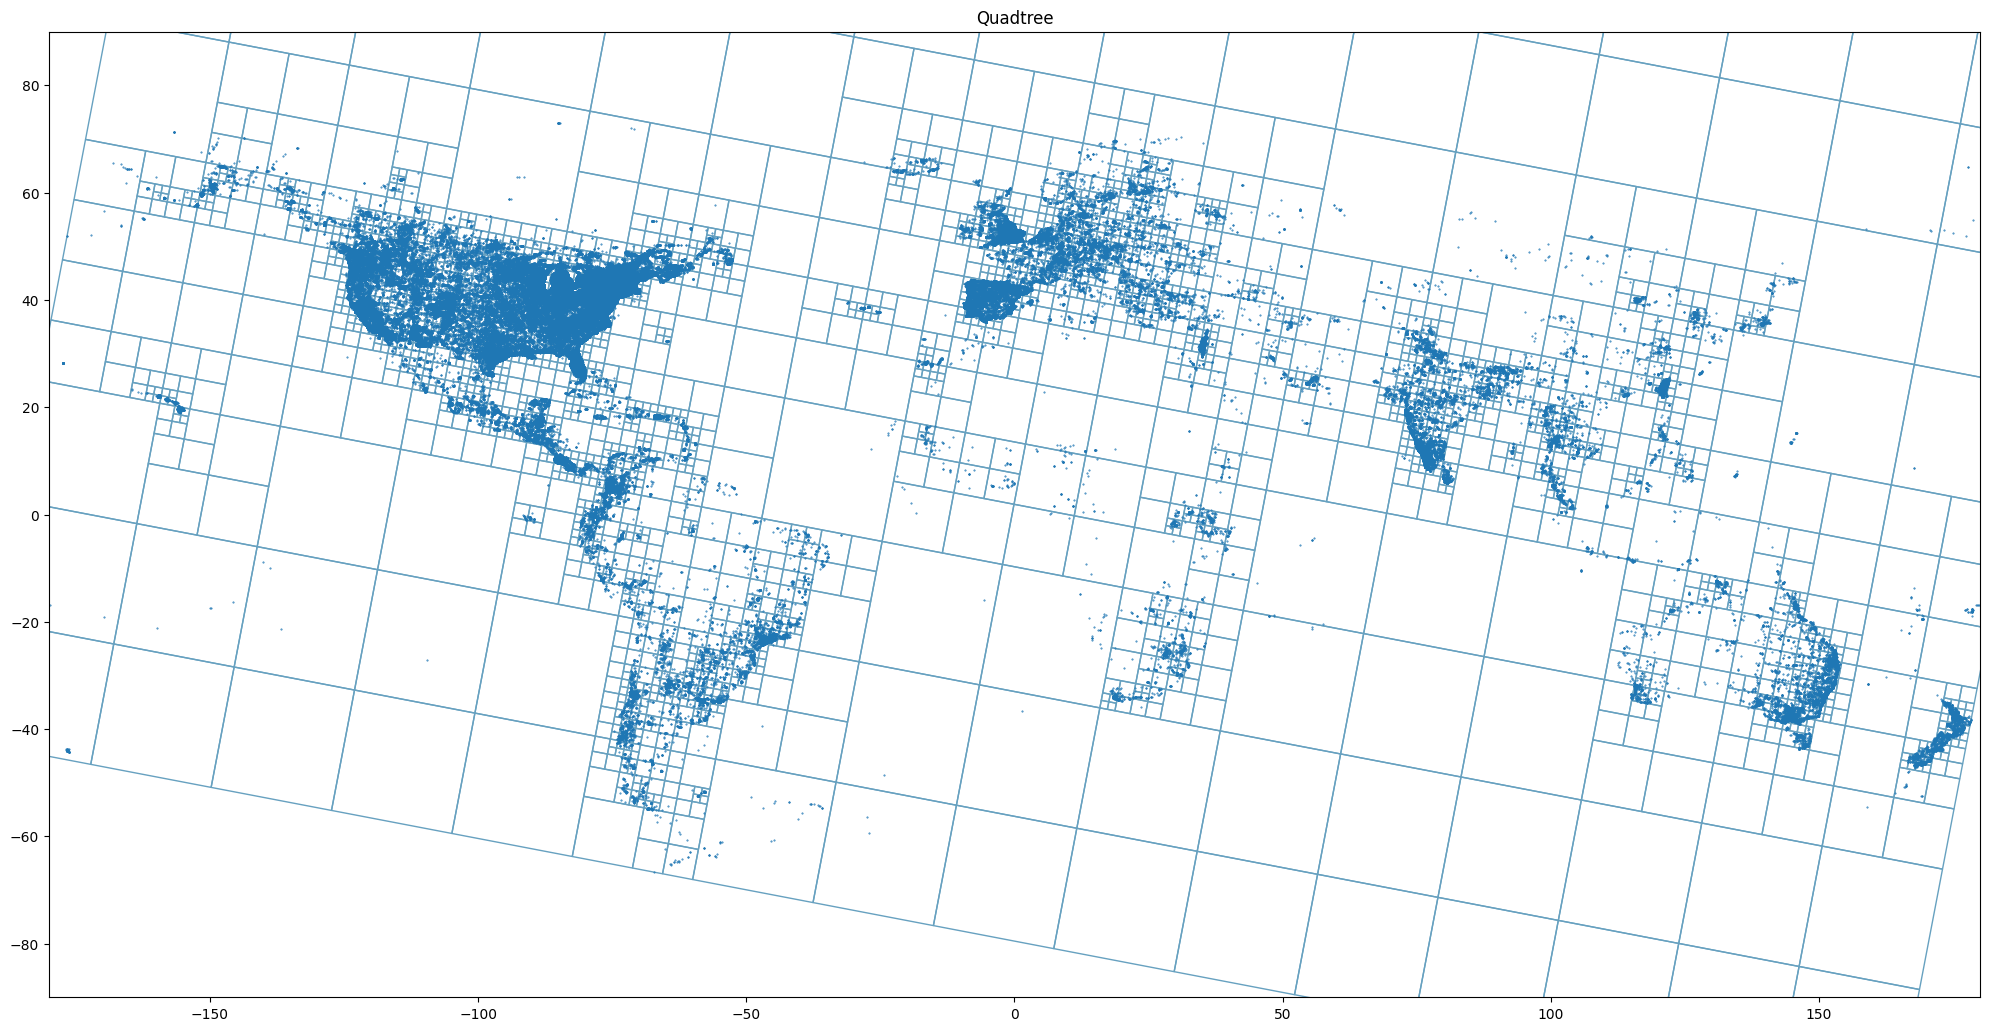

In [150]:
ax


# Test model

In [10]:
from BirdSTEM.model.AdaSTEM import AdaSTEM, AdaSTEMClassifier, AdaSTEMRegressor, AdaSTEMHurdle
from BirdSTEM.model.Hurdle import Hurdle
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor


In [11]:
# base_model = DecisionTreeClassifier(random_state=42)

In [14]:
base_model = Hurdle(classifier=XGBClassifier(random_state=42, verbosity = 0, n_jobs=1),
                    regressor=XGBRegressor(random_state=42, verbosity = 0, n_jobs=1))

# base_model = Hurdle(classifier=DecisionTreeClassifier(),
#                     regressor=DecisionTreeRegressor())


# base_model = XGBRegressor(random_state=42, verbosity=0, n_jobs=1)


In [17]:
# model = AdaSTEM(base_model=base_model,
#                 task='hurdle',
#                           ensemble_fold = 2,
#                           min_ensemble_require= 1,
#                           grid_len_long_upper_threshold=25,
#                             grid_len_long_lower_threshold=10,
#                             grid_len_lat_upper_threshold=25,
#                             grid_len_lat_lower_threshold=10,
#                             points_lower_threshold=10,
#                             temporal_start = 1, temporal_end=366, temporal_step=20, temporal_bin_interval = 50,
#                             stixel_training_size_threshold = 10, ## important
#                             save_gridding_plot = True,
#                             save_tmp = True,
#                             save_dir='./',
#                             sample_weights_for_classifier=True)

model = AdaSTEMHurdle(base_model=base_model,
                          ensemble_fold = 10,
                          min_ensemble_require= 7,
                          grid_len_long_upper_threshold=25,
                            grid_len_long_lower_threshold=10,
                            grid_len_lat_upper_threshold=25,
                            grid_len_lat_lower_threshold=10,
                            points_lower_threshold=10,
                            temporal_start = 1, temporal_end=366, temporal_step=20, temporal_bin_interval = 50,
                            stixel_training_size_threshold = 10, ## important
                            save_gridding_plot = True,
                            save_tmp = True,
                            save_dir='./',
                            sample_weights_for_classifier=True)



In [18]:
model.fit(X_train,y_train)


Generating Ensemble: 100%|██████████| 2/2 [00:15<00:00,  7.93s/it]


Saved! ./ensemble_quadtree_df.csv


training: 100%|██████████| 5084/5084 [03:09<00:00, 26.81it/s]


In [20]:
pred_mean, pred_std = model.predict(X_test)


predicting ensemble 1 : 100%|██████████| 2909/2909 [00:04<00:00, 582.76it/s]


In [21]:
np.sum(np.isnan(pred_mean)) / len(pred_mean)

0.0009083333333333334

(array([1.19073e+05, 6.81000e+02, 9.80000e+01, 2.50000e+01, 7.00000e+00,
        2.00000e+00, 3.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 0.        ,  4.4998332 ,  8.9996664 , 13.49949961, 17.99933281,
        22.49916601, 26.99899921, 31.49883242, 35.99866562, 40.49849882,
        44.99833202]),
 <BarContainer object of 10 artists>)

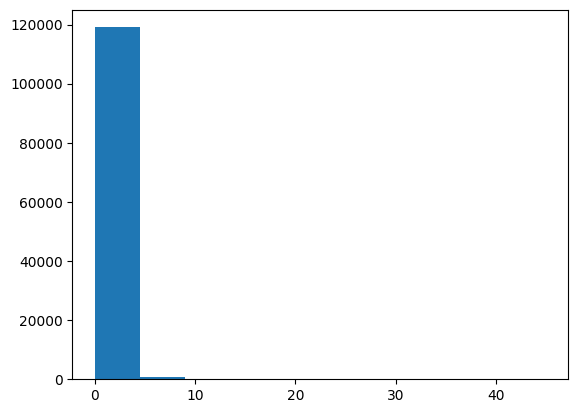

In [22]:
plt.hist(pred_mean)

In [23]:
def eval_STEM_res(y_test, y_pred):
    from sklearn.metrics import roc_auc_score, cohen_kappa_score, r2_score, d2_tweedie_score, \
        f1_score, precision_score, recall_score, average_precision_score, mean_absolute_error, mean_squared_error
    from scipy.stats import pearsonr, spearmanr

    auc = roc_auc_score(np.where(y_test>0, 1, 0), np.where(y_pred>0, 1, 0))
    kappa = cohen_kappa_score(np.where(y_test>0, 1, 0), np.where(y_pred>0, 1, 0))
    f1 = f1_score(np.where(y_test>0, 1, 0), np.where(y_pred>0, 1, 0))
    precision = precision_score(np.where(y_test>0, 1, 0), np.where(y_pred>0, 1, 0))
    recall = recall_score(np.where(y_test>0, 1, 0), np.where(y_pred>0, 1, 0))
    average_precision = average_precision_score(np.where(y_test>0, 1, 0), np.where(y_pred>0, 1, 0))
    
    a = pd.DataFrame({
        'y_ture':y_test,
        'pred':y_pred
    }).dropna()
    s_r, _ = spearmanr(a.y_ture, a.pred)
    p_r, _ = pearsonr(a.y_ture, a.pred)
    r2 = r2_score(a.y_ture, a.pred)
    MAE = mean_absolute_error(a.y_ture, a.pred)
    MSE = mean_squared_error(a.y_ture, a.pred)
    poisson_deviance_explained = d2_tweedie_score(a[a.pred>0].y_ture, a[a.pred>0].pred, power=1)
    return {
        'AUC':auc,
        'kappa':kappa,
        'f1':f1,
        'precision':precision,
        'recall':recall,
        'average_precision':average_precision,
        'Spearman_r':s_r,
        'Pearson_r':p_r,
        'R2':r2,
        'poisson_deviance_explained':poisson_deviance_explained
    }


In [24]:
eval_metrics =  eval_STEM_res(y_test, pred_mean)
eval_metrics


{'AUC': 0.8882059317887521,
 'kappa': 0.6078437158840837,
 'f1': 0.6251790830945559,
 'precision': 0.5109029708766282,
 'recall': 0.8053056516724337,
 'average_precision': 0.4184663832365188,
 'Spearman_r': 0.633102723898707,
 'Pearson_r': 0.4622706131960581,
 'R2': 0.19256021464665352,
 'poisson_deviance_explained': 0.1943629197875133}

In [187]:
checklist_data['abundance'] = model.predict_proba(checklist_data[model.x_names + ['sampling_event_identifier','longitude','latitude']])


predicting ensemble 4 : 100%|██████████| 1993/1993 [00:06<00:00, 291.07it/s]


0.0.0.0.0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.46.47.48.49.50.51.52.53.54.55.56.57.58.59.60.61.62.63.64.65.66.67.68.69.70.71.72.73.74.75.76.77.78.79.80.81.82.83.84.85.86.87.88.89.90.91.92.93.94.95.96.97.98.99.100.101.102.103.104.105.106.107.108.109.110.111.112.113.114.115.116.117.118.119.120.121.122.123.124.125.126.127.128.129.130.131.132.133.134.135.136.137.138.139.140.141.142.143.144.145.146.147.148.149.150.151.152.153.154.155.156.157.158.159.160.161.162.163.164.165.166.167.168.169.170.171.172.173.174.175.176.177.178.179.180.181.182.183.184.185.186.187.188.189.190.191.192.193.194.195.196.197.198.199.200.201.202.203.204.205.206.207.208.209.210.211.212.213.214.215.216.217.218.219.220.221.222.223.224.225.226.227.228.229.230.231.232.233.234.235.236.237.238.239.240.241.242.243.244.245.246.247.248.249.250.251.252.253.254.255.256.257.258.259.260.261.262.263.264.265.266.267.268.269.270.271.272.273.274.27

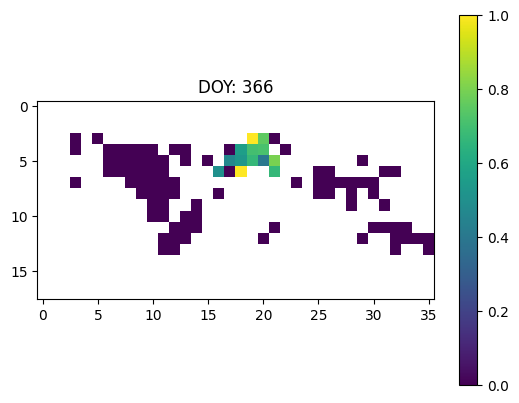

In [188]:
data_origin = checklist_data[['sampling_event_identifier','longitude','latitude','DOY','abundance']]
data_origin['abundance'] = np.where(data_origin['abundance']>0, 1, 0)
make_sample_gif(data_origin ,'./Sample_data_origin.gif')


In [191]:
checklist_data[['sampling_event_identifier','longitude','latitude','DOY','abundance']]

,sampling_event_identifier,longitude,latitude,DOY,abundance
0,S63715931,-83.472224,8.859308,22,0.0
1,S74887705,-2.687724,43.373323,290,0.0
2,S69422622,-89.884770,35.087255,141,0.0
3,S67735715,-99.216873,31.218510,104,0.0
4,S66786737,-124.426730,43.065847,96,0.0
...,...,...,...,...,...
399995,S70673435,-93.856544,45.343599,173,0.0
399996,S75369953,-103.538804,41.770665,298,0.0
399997,S76350841,-68.873896,47.671126,208,0.0
399998,S74885417,-0.034332,51.562772,290,1.0


0.0.0.0.0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.46.47.48.49.50.51.52.53.54.55.56.57.58.59.60.61.62.63.64.65.66.67.68.69.70.71.72.73.74.75.76.77.78.79.80.81.82.83.84.85.86.87.88.89.90.91.92.93.94.95.96.97.98.99.100.101.102.103.104.105.106.107.108.109.110.111.112.113.114.115.116.117.118.119.120.121.122.123.124.125.126.127.128.129.130.131.132.133.134.135.136.137.138.139.140.141.142.143.144.145.146.147.148.149.150.151.152.153.154.155.156.157.158.159.160.161.162.163.164.165.166.167.168.169.170.171.172.173.174.175.176.177.178.179.180.181.182.183.184.185.186.187.188.189.190.191.192.193.194.195.196.197.198.199.200.201.202.203.204.205.206.207.208.209.210.211.212.213.214.215.216.217.218.219.220.221.222.223.224.225.226.227.228.229.230.231.232.233.234.235.236.237.238.239.240.241.242.243.244.245.246.247.248.249.250.251.252.253.254.255.256.257.258.259.260.261.262.263.264.265.266.267.268.269.270.271.272.273.274.27

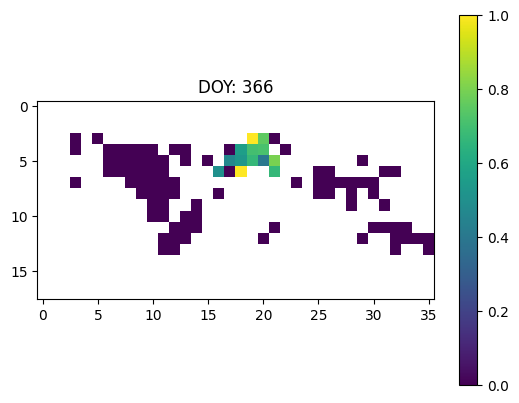

In [199]:
data_pred = checklist_data[['sampling_event_identifier','longitude','latitude','DOY','abundance']]
data_pred['abundance'] = np.where(data_pred['abundance']>0, 1, 0)
# del data_pred['abundance']
make_sample_gif(data_pred ,'./Sample_data_pred.gif')


# Traditional randomforest & decision tree

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight

In [29]:
baseline_model = Hurdle(classifier=XGBClassifier(random_state=42, verbosity = 0, n_jobs=1),
                    regressor=XGBRegressor(random_state=42, verbosity = 0, n_jobs=1))
sample_weights = class_weight.compute_sample_weight(class_weight='balanced',y=np.where(y_train>0,1,0))
baseline_model.fit(X_train[x_names].values, y_train, sample_weight=sample_weights)
baseline_pred = baseline_model.predict(X_test[x_names].values)



In [33]:
eval_STEM_res(y_test, baseline_pred.flatten())

{'AUC': 0.9394915994272326,
 'kappa': 0.5325714908413701,
 'f1': 0.5562667767912451,
 'precision': 0.39640965273690404,
 'recall': 0.9321799307958477,
 'average_precision': 0.37197512265509325,
 'Spearman_r': 0.5939423377142921,
 'Pearson_r': 0.4308635299231611,
 'R2': 0.007312546114300322,
 'poisson_deviance_explained': -0.07403872951628698}